In [34]:
import os
from pydantic import Discriminator, Field, Tag
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
print('all ok')

all ok


In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model = 'gemini-1.5-flash')
output = model.invoke('hi')
print(output.content)

Hi there! How can I help you today?


Config the embedding model

In [42]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

/Users/sureshcheepurupalli/Documents/GNENAI_COURSE/GENAI_Practice/GENAI_Basics/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

Lets take a data embedde it and store in VDB.

In [108]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [59]:
loader=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader)

In [60]:
docs=loader.load()

In [46]:
docs

[Document(metadata={'source': '../data2/usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which rank

In [61]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [62]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [63]:
new_docs=text_splitter.split_documents(documents=docs)

In [64]:
new_docs

[Document(metadata={'source': '../data2/usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '../data2/usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': '../data2/usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': '../data2/usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '../data2/usa.txt'}, page_content='innovation, global trade, and finan

In [65]:
doc_string=[doc.page_content for doc in new_docs]

In [66]:
doc_string

['🇺🇸 Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP – Size, Composition, and Global Share',
 'As of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 

In [67]:
len(doc_string)

55

In [111]:
db=Chroma.from_documents(new_docs,embeddings)

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [74]:
### Pydantic Class.
from pydantic import BaseModel, Field
import operator
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage

class TopicSelectionParser(BaseModel):
    Tpoic: str = Field(description = "Selected Topic")
    Reasoning: str = Field(description = "Reasoning behind topic selection")

In [77]:
from langchain.output_parsers import PydanticOutputParser

parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [78]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Tpoic": {"description": "Selected Topic", "title": "Tpoic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Tpoic", "Reasoning"]}\n```'

In [79]:
class AgentState(TypedDict):
    message: Annotated[Sequence[BaseMessage], operator.add]

In [113]:
Agentstate = {}
Agentstate["messages"]=[]
Agentstate

{'messages': []}

In [81]:
Agentstate["messages"].append("hi how are you?")

In [82]:
Agentstate

{'messages': ['hi how are you?']}

In [83]:
Agentstate["messages"].append("what are you doing?")

In [84]:
Agentstate

{'messages': ['hi how are you?', 'what are you doing?']}

In [85]:
Agentstate["messages"].append("i hope everything fine")

In [86]:
Agentstate

{'messages': ['hi how are you?',
  'what are you doing?',
  'i hope everything fine']}

In [87]:
Agentstate["messages"][-1]

'i hope everything fine'

In [88]:
Agentstate["messages"][0]

'hi how are you?'

In [ ]:
def function_1(state : AgentState):
    question = state["messages"][-1]
    print("Question:: ", question)

    template = '''
    your task is to classiy the given user into one of the following categories: [USA, Not Related]
    Only respond with category name and nothing else.
    
    User query : {question}
    {format_instructions}
    '''

    prompt = PromptTemplate(
        template = template,
        input_variable = ["question"],
        partial_variables = {"format_instructions" : parser.get_format_instruction()}
    )

    chain  = prompt | model | parser

    response = chain.invoke({"question" : question})

    print("Parsed response:: ", response)

    return  {"message" : [response.Topic]}

In [ ]:
state = []

In [ ]:
# RAG Function
def function_2(state : AgentState):
    print("Inside RAG Call")
    question = state["messages"][0]
    rag_chain = 

    # TODO:

In [ ]:
# LLM Function
def function_3(state : AgentState):
    print("Inside LLM Call")
    question = state["messages"][0]

In [ ]:
def router(state : AgentState):   ### For conditional Edges.
    print("Inside Router")
    last_message = state["messages"][-1]
    print("Last_Messages :: ", last_message)

    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [94]:
from langgraph.graph import StateGraph, END

In [95]:
workflow =  StateGraph(AgentState)

In [96]:
workflow.add_node("Supervisor", function_1)

In [97]:
workflow.add_node("RAG", function_2)

In [98]:
workflow.add_node("LLM", function_3)

In [99]:
workflow.set_entry_point("Supervisor")

In [103]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call" : "RAG",
        "LLM Call" : "LLM"
    }
)

In [104]:
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

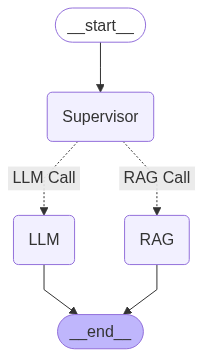

In [105]:
workflow.compile()

Assignment : 4

1. You have to create one Supervisor node
2. Create one router function
3. Create three or more nodes:
       1. LLM Call node. 
       2. RAG node, 
       3. Web crawler(fetch the info in relatime from internet)
4. Create One more node for validation of Generated output --> Explore the validation part.
5. if validation is going to fail in that case go to supervisor node then supervisor node going to decide what node needs to be called next.
6. Once the validation will pass then only generate the final output.



